$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 3$
---
Piotr Cenda, gr 1b
---

# 3.1 Convolutional Neural Networks - Introduction


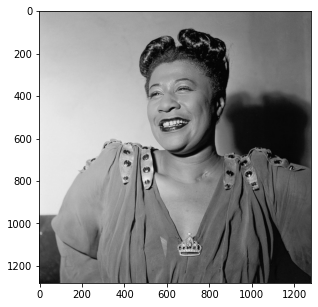

In [1]:
#Load an image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5) 


response = requests.get('https://cdn.pixabay.com/photo/2016/05/11/18/57/ella-fitzgerald-1386214_1280.jpg')
img = Image.open(BytesIO(response.content))


plt.imshow(img)

X_img.shape=(1280, 1280, 3)
X.shape=(1280, 1280)


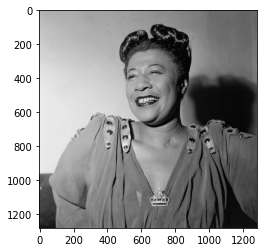

In [2]:
import numpy as np
X_img = np.array(img)
print(f'X_img.shape={X_img.shape}')

X=X_img[:,:,0]
print(f'X.shape={X.shape}')
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(X)

## Convolution 2D

During the convolution a small filter F slides along an image X. 
Then the filter elements are multiplied by corresponding pixel values and summed. Convolution can be used to blurr an image, but also detect edges or extract gradients of pixel intensity. 

[Diagram](https://miro.medium.com/max/928/0*e-SMFTzO8r7skkpc)


In [3]:
def conv2D(X,F,bias=0):
  w = F.shape[1]//2
  h = F.shape[0]//2
  Y = [[np.sum(X[i-h:i+h+1,j-w:j+w+1]*F) + bias for j in np.arange(w,X.shape[1]-w)] for i in np.arange(h,X.shape[0]-h)]
  return np.array(Y)

In [4]:
def apply_two_convolutions(X):
  F_sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  F_sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  XX = conv2D(X,F_sobel_x,1)
  XY = conv2D(X,F_sobel_y,1)
  return XX, XY

AX, AY = apply_two_convolutions(X)

In [5]:
print(f'X.shape={X.shape} AX.shape={AX.shape} AY.shape={AY.shape}')

X.shape=(1280, 1280) AX.shape=(1278, 1278) AY.shape=(1278, 1278)


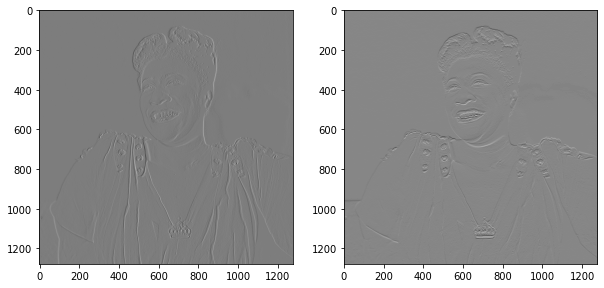

In [6]:
def plot(X, Y, cmap='gray'):
  fig = plt.figure(figsize=(10,10))
  plt.set_cmap(cmap) 
  fig.add_subplot(1,2,1)
  # plt.axis('off')
  plt.imshow(X) 
  fig.add_subplot(1,2,2)
  plt.imshow(Y) 

plot(AX, AY)

During max pooling a window slides through an image (the strides are equal to the window sizes). At each position the maximal value of the pixel within the window is selected. Max pooling shrinks the image size. 

image size:(639, 639)


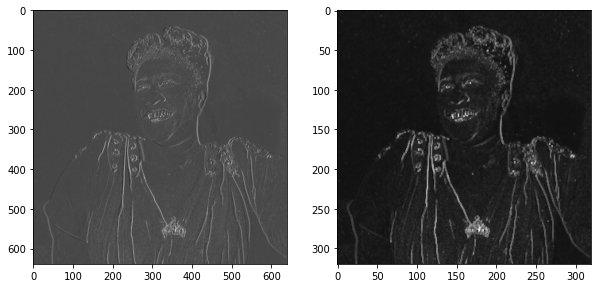

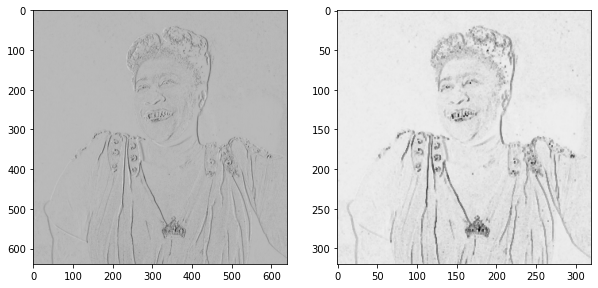

In [7]:
def maxPool2D(X,shape):
  w = shape[1]
  h = shape[0]
  # print(f'h={h} w={w}')
  Y=[[np.max(X[i:i+h+1,j:j+w+1]) for j in np.arange(0,X.shape[1],shape[1])] for i in np.arange(0,X.shape[0],shape[0])]
  return np.array(Y)

AX = maxPool2D(AX,(2,2))
AY = maxPool2D(AX,(2,2))
plot(AX, AY)
plot(AX, AY,cmap='gray_r')
print(f'image size:{AX.shape}')

We will repeat the convolution and max-pooling steps several times... 

image size:(319, 319)


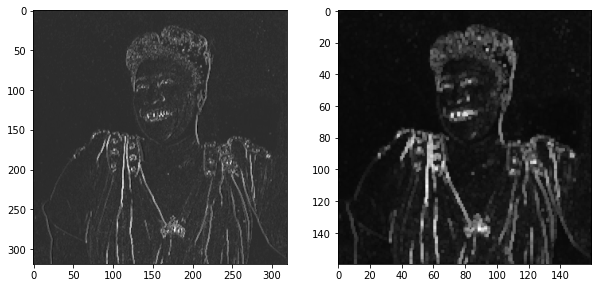

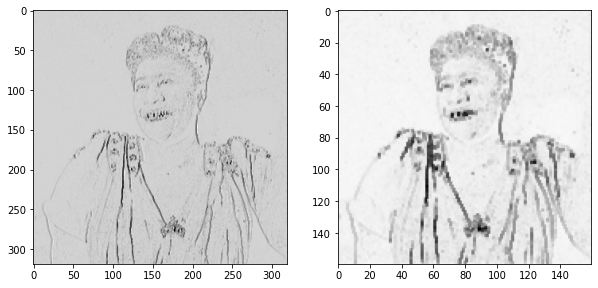

In [8]:
AX, AY = apply_two_convolutions(AX)
AX = maxPool2D(AX,(2,2))
AY = maxPool2D(AX,(2,2))
plot(AX, AY)
plot(AX, AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(159, 159)


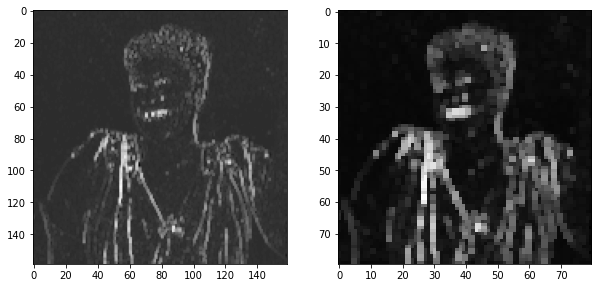

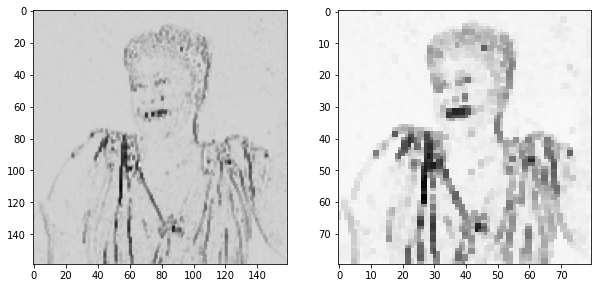

In [9]:
AX, AY = apply_two_convolutions(AX)
AX = maxPool2D(AX,(2,2))
AY = maxPool2D(AX,(2,2))
plot(AX, AY)
plot(AX, AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(79, 79)


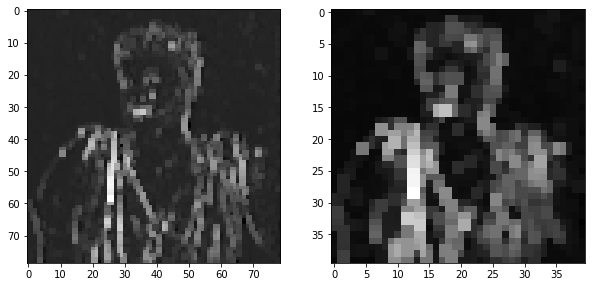

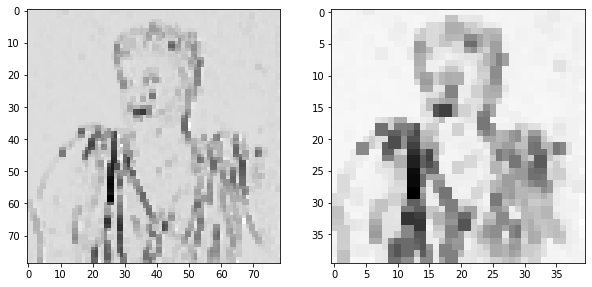

In [10]:
AX, AY = apply_two_convolutions(AX)
AX = maxPool2D(AX,(2,2))
AY = maxPool2D(AX,(2,2))
plot(AX, AY)
plot(AX, AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(39, 39)


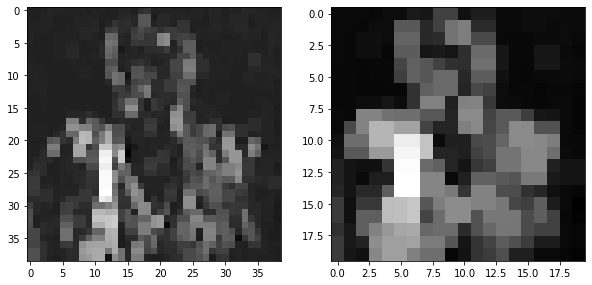

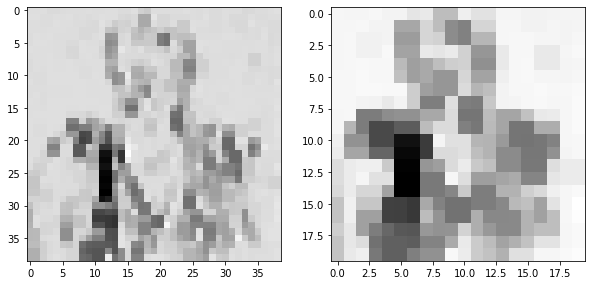

In [11]:
AX, AY = apply_two_convolutions(AX)
AX = maxPool2D(AX,(2,2))
AY = maxPool2D(AX,(2,2))
plot(AX, AY)
plot(AX, AY,cmap='gray_r')
print(f'image size:{AX.shape}')

Probably the last convolution went too far...

Then the image is flattened (converted to a vector) and submitted as input to next processing steps (e.g. classification).

In [12]:
AX_flattended = AX.flatten()
print(f'After flattening: {AX_flattended.shape}')

After flattening: (1521,)


## CNN

Typical process in image recogntion (old approach):

**Feature extraction**
1.   Preprocess an image (eg. apply filters, convert to grayscale)
2.   Select a convolution filter
3.   Apply convolution in order to extract features, use a functions like [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html), probably written in C
4.   Optionally: apply max pooling
5.   Optionally: repeat steps 2, 3, 4
**Training and testing**
6.   Select a classifier, e.g. SVM
7.   Train the classifier using vectors of extracted features as observations
8.   Test its performance
8.   If not satisfied return to 1



Basic ideas of CNNs:
*  Feature extraction is included into the training process: convolutional layers are parts of the architecture
*  No savvy filter selection is required: filters are learned (based on the loss function that expresses classification or regression goals)
*  At a given steps a number of filters can be applied simultaneously adding the corresponding number of channels at output
*  Architecture may contain multiple sequences of convolution and pooling steps. It is believed that this corresponds to extracting more and more abstract features, eg: 
   * First sequence: extract contours
   * Second layer: extract such objects as eyes, noses
   * Third layer: extract faces, etc 

**TODO 3.1.1** Calculate the number of trainable parameters. 

Provide the formula that gives the number of trainable parameters based on the values of defined variables.

$P = (kernel\_size^2 * channels * filters + filters) + tensor\_shape\_after\_pooling^2 + 1$

(1 stands for output shape, in this case always 1)

Fill in the table below

| (img_cols,img_rows) | channels | filters | kernel size | Tensor shape after convolution | Tensor shape after pooling | number of parameters |
|---------------------|----------|---------|-------------|--------------------------------|----------------------------|----------------------|
| (10,10)             | 1        | 1       | (3,3)       | (8, 8)                            | (4, 4)                        | 27                  |
| (10,10)             | 1        | 5       | (3,3)       | (8, 8)                               | (4, 4)                           | 137                     |
| (10,10)             | 3        | 1       | (5,5)       | (6, 6)                               | (3, 3)                           | 86                     |
| (10,10)             | 3        | 5       | (3,3)       | (8, 8)                               | (4, 4)                           | 221                     |
| (16,16)             | 3        | 64      | (3,3)       | (14, 14)                               | (7, 7)                           | 4929                     |


Observe the following:
*   None in an output shape is the dimension for multiple observations (here:  images) in an input batch
*   The same filter is applied to all image channels, then the bias term added.
*   All filters have separate parameters
*   Number of parameters for a dense layer is equal to the number of connections + one for the bias term

In [13]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#variables
img_rows=16
img_cols=16
channels=3
filters=6
kernel_size=(3,3)

model = models.Sequential()
model.add(layers.Conv2D(filters, kernel_size=kernel_size, activation='relu', input_shape=(img_rows, img_cols,channels,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 6)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 294)               0         
                                                                 
 dense (Dense)               (None, 1)                 295       
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


# 3.2 Applying CNN to Fashion dataset

In [14]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
X=X/255

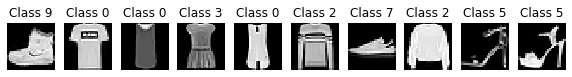

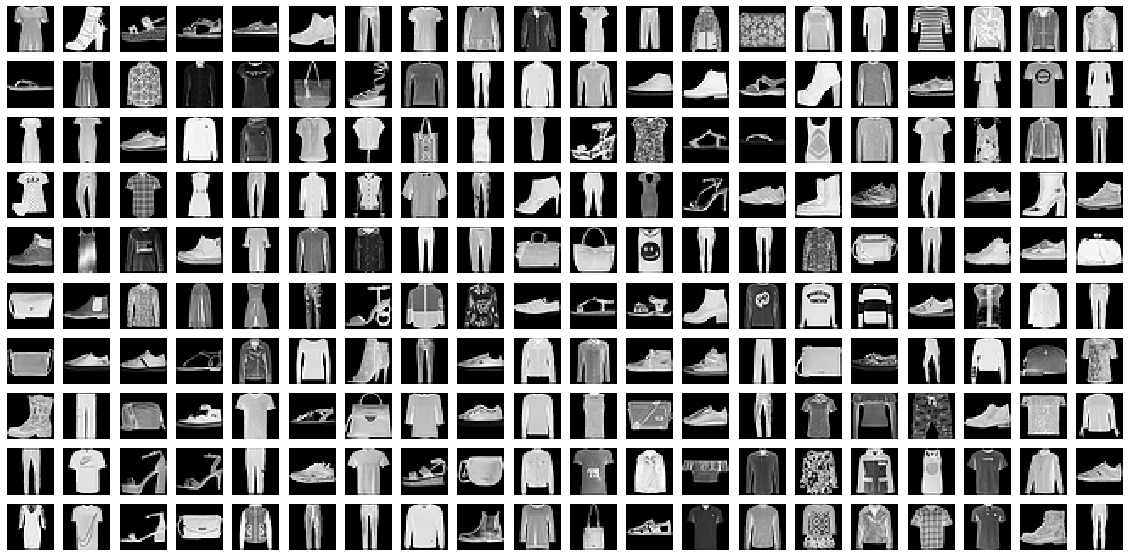

In [15]:
# Show a few sample clothes from the training set
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    plt.imshow(x_train[index]) # index of the sample picture
    plt.title("Class " + str(y_train[index]))
plt.show()

# Show a few sample clothes from the training set
plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
col2 = 20
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(x_train[index]) # index of the sample picture
plt.show()

In [16]:
print(f'X.shape={X.shape}')
img_rows = X.shape[1]
img_cols = X.shape[2]
num_classes = np.max(y)+1

X.shape=(70000, 28, 28)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

Create a CNN model

In [18]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

tf.random.set_seed(42)

model1 = models.Sequential()
model1.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
model1.add(layers.MaxPooling2D((2, 2)))
# Flatten the output to input data to the Dense layer
model1.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                43296     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [19]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(0.02), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
epochs = 20
batch_size = 2048
hist = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 3s 46ms/step - loss: 1.3605 - accuracy: 0.5467 - val_loss: 0.6251 - val_accuracy: 0.7569
Epoch 2/20
23/23 [==============================] - 1s 24ms/step - loss: 0.5734 - accuracy: 0.7857 - val_loss: 0.5669 - val_accuracy: 0.8001
Epoch 3/20
23/23 [==============================] - 1s 24ms/step - loss: 0.4940 - accuracy: 0.8188 - val_loss: 0.5205 - val_accuracy: 0.8146
Epoch 4/20
23/23 [==============================] - 1s 24ms/step - loss: 0.4360 - accuracy: 0.8419 - val_loss: 0.4647 - val_accuracy: 0.8182
Epoch 5/20
23/23 [==============================] - 1s 26ms/step - loss: 0.4147 - accuracy: 0.8481 - val_loss: 0.3789 - val_accuracy: 0.8609
Epoch 6/20
23/23 [==============================] - 1s 26ms/step - loss: 0.3860 - accuracy: 0.8583 - val_loss: 0.3633 - val_accuracy: 0.8628
Epoch 7/20
23/23 [==============================] - 1s 24ms/step - loss: 0.3705 - accuracy: 0.8642 - val_loss: 0.3562 - val_accuracy: 0.8726
Epoch 8/20
23

Compute scores on the validation set

In [21]:
val_loss1, val_acc1 = model1.evaluate(X_test, y_test)
print('validation accuracy:', val_acc1)
print('validation loss:', val_loss1)

722/722 [==============================] - 2s 3ms/step - loss: 0.3378 - accuracy: 0.8923
validation accuracy: 0.8922510743141174
validation loss: 0.33779165148735046


Display the confusion matrix

The function from the previous classes was split into two functions...

In [22]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the confusion matrix for the results
def show_confusion_matrix(matrix, labels=None):
    num_classes = matrix.shape[0]
    if labels is None:
      labels = [str(i) for i in range(num_classes)]
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels[0:num_classes],
                yticklabels=labels[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def compute_and_show_confusion_matrix(validations, predictions, labels=None):
    matrix = metrics.confusion_matrix(validations, predictions)
    show_confusion_matrix(matrix, labels)

In [23]:
probs = model1.predict(X_test)
y_pred = np.argmax(probs,axis=1)
print(f'y_pred.shape={y_pred.shape}')

y_pred.shape=(23100,)


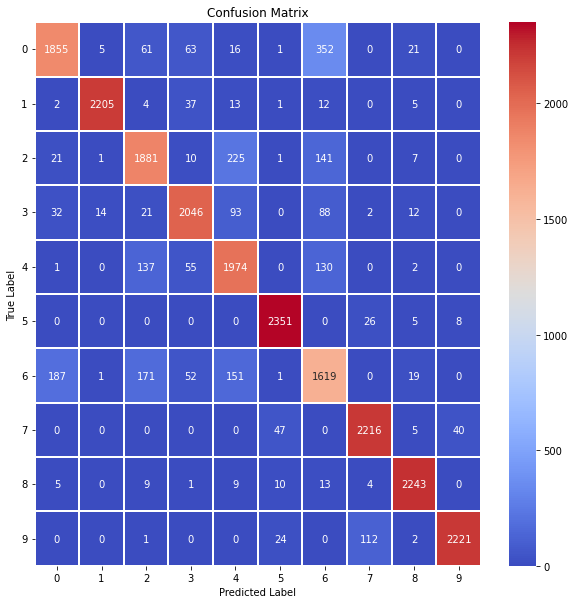

In [24]:
compute_and_show_confusion_matrix(y_test, y_pred)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2374
           1       0.99      0.97      0.98      2279
           2       0.82      0.82      0.82      2287
           3       0.90      0.89      0.90      2308
           4       0.80      0.86      0.83      2299
           5       0.97      0.98      0.97      2390
           6       0.69      0.74      0.71      2201
           7       0.94      0.96      0.95      2308
           8       0.97      0.98      0.97      2294
           9       0.98      0.94      0.96      2360

    accuracy                           0.89     23100
   macro avg       0.89      0.89      0.89     23100
weighted avg       0.89      0.89      0.89     23100



# 3.3 Wrap it as a function

Digression related to Python technicalities:

*  it is possible to define a function taking as parameter a dictionary mapping keywords to values
*  and call it specifying keywords or passing a dictionary

In [26]:
def foo(**kwargs):
  print('foo')
  for k in kwargs:
    print(k,kwargs[k])

foo(ala=0,ma=1,kota=2)


foo
ala 0
ma 1
kota 2


In [27]:
def boo(**kwargs):
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',111)
  kota = kwargs.get('kota',222)
  print('boo',ala,ma,kota)

boo(ala=23)

boo(**{'ala':123,'ma':12})

boo 23 111 222
boo 123 12 222


It is up to you what to do with unknown keywords

In [28]:
def woo(**kwargs):
  keywords = ['ala','ma','kota']
  for k in kwargs:
    if k not in keywords:
      raise ValueError(f'Unknown keyword {k}')
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',1)
  kota = kwargs.get('kota',2)
  print('woo',ala,ma,kota)

woo(**{'ala':-1})
try:
  woo(**{'ala':-1,'ola':-2})
except Exception as e:
  print(e)

woo -1 1 2
Unknown keyword ola


## Define a function building a CNN model

**TODO 3.3.1** define at least two other models  and name it using keywords, e.g 'model_1', 'model_2', etc

In [29]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l1_l2
import tensorflow as tf

def build_model(model_name, input_shape, num_classes, random_state=42):
  tf.random.set_seed(random_state)
  if model_name == 'model_0':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_1':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_2':
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.15))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_3':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.15))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.15))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model 
  else:
    return None

## The function that trains a model, tests it and return scores

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def perform_test(X_train, y_train, X_test, y_test, **kwargs):
  model_name = kwargs['model_name']
  epochs = kwargs.get('epochs',20)
  learning_rate = kwargs.get('learning_rate',0.01)
  batch_size = kwargs.get('batch_size',1024)
  random_seed = kwargs.get('random_seed',42)
  returnModel = kwargs.get('returnModel',True)
  
  input_shape = list(X_train.shape[1:])
  input_shape.append(1)
  input_shape = tuple(input_shape)

  num_classes = np.max(y_train)+1
  model = build_model(model_name, input_shape=input_shape, num_classes=num_classes, random_state=random_seed)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
  preds = model.predict(X_test)
  y_pred = np.argmax(preds, axis=1)
  print(f'y_pred {y_pred.shape} {y_test.shape}')
  results = {}
  results['confusion_matrix'] = confusion_matrix(y_pred, y_test)
  results['accuracy'] = accuracy_score(y_pred, y_test)
  results['precision'] = precision_score(y_pred, y_test, average='macro')
  results['recall'] = recall_score(y_pred, y_test, average='macro')
  results['f1'] = f1_score(y_pred, y_test, average='macro')
  if returnModel:
    results['model'] = model
  return results


## Configurations
We will define a number of configurations to be tested, Each configuration defines the model name and a number of hyperparameters.


In [31]:
configurations={'1st configuration':{'model_name':'model_0', 'epochs':20, 'learning_rate':0.01, 'random_seed':42},
                '2nd configuration':{'model_name':'model_1', 'epochs':20, 'learning_rate':0.01, 'random_seed':42},
                '3rd configuration':{'model_name':'model_2', 'epochs':20, 'learning_rate':0.01, 'random_seed':42},
                '4th configuration':{'model_name':'model_3', 'epochs':20, 'learning_rate':0.01, 'random_seed':42},
                '5th configuration':{'model_name':'model_0', 'epochs':40, 'learning_rate':0.005, 'random_seed':42},
                '6th configuration':{'model_name':'model_1', 'epochs':40, 'learning_rate':0.005, 'random_seed':42},
                '7th configuration':{'model_name':'model_2', 'epochs':40, 'learning_rate':0.005, 'random_seed':42},
                '8th configuration':{'model_name':'model_3', 'epochs':40, 'learning_rate':0.005, 'random_seed':42}
}



**TODO 3.3.2** Call the function perform_test for each configuration, print returned score values and display confusion matrix.

Epoch 1/20
46/46 [==============================] - 1s 14ms/step - loss: 0.9420 - accuracy: 0.6794
Epoch 2/20
46/46 [==============================] - 1s 11ms/step - loss: 0.4795 - accuracy: 0.8254
Epoch 3/20
46/46 [==============================] - 1s 12ms/step - loss: 0.4030 - accuracy: 0.8532
Epoch 4/20
46/46 [==============================] - 1s 11ms/step - loss: 0.3595 - accuracy: 0.8681
Epoch 5/20
46/46 [==============================] - 1s 11ms/step - loss: 0.3275 - accuracy: 0.8784
Epoch 6/20
46/46 [==============================] - 1s 11ms/step - loss: 0.3030 - accuracy: 0.8873
Epoch 7/20
46/46 [==============================] - 1s 11ms/step - loss: 0.2871 - accuracy: 0.8928
Epoch 8/20
46/46 [==============================] - 1s 11ms/step - loss: 0.2694 - accuracy: 0.8997
Epoch 9/20
46/46 [==============================] - 1s 11ms/step - loss: 0.2560 - accuracy: 0.9041
Epoch 10/20
46/46 [==============================] - 1s 11ms/step - loss: 0.2438 - accuracy: 0.9067
Epoch 11/

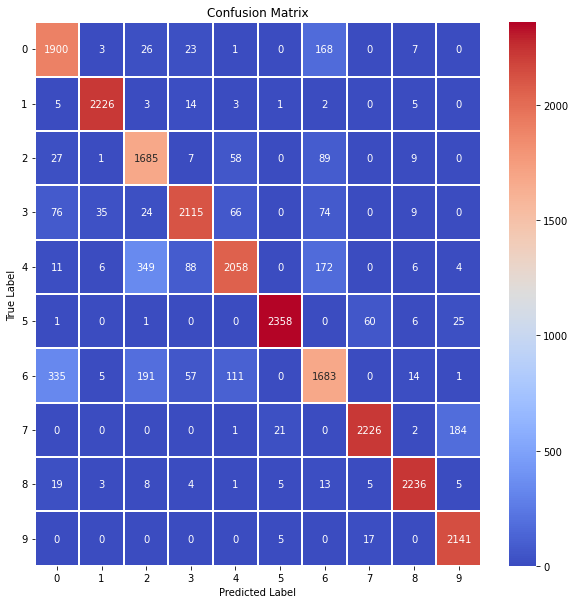

Accuracy:	0.893
Precision:	0.892
Recall:	0.896
F1:	0.892
Epoch 1/20
46/46 [==============================] - 1s 16ms/step - loss: 1.2071 - accuracy: 0.5784
Epoch 2/20
46/46 [==============================] - 1s 15ms/step - loss: 0.6218 - accuracy: 0.7670
Epoch 3/20
46/46 [==============================] - 1s 15ms/step - loss: 0.5234 - accuracy: 0.8048
Epoch 4/20
46/46 [==============================] - 1s 15ms/step - loss: 0.4624 - accuracy: 0.8283
Epoch 5/20
46/46 [==============================] - 1s 15ms/step - loss: 0.4203 - accuracy: 0.8418
Epoch 6/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3928 - accuracy: 0.8533
Epoch 7/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3772 - accuracy: 0.8567
Epoch 8/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3557 - accuracy: 0.8665
Epoch 9/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3426 - accuracy: 0.8718
Epoch 10/20
46/46 [==============================] -

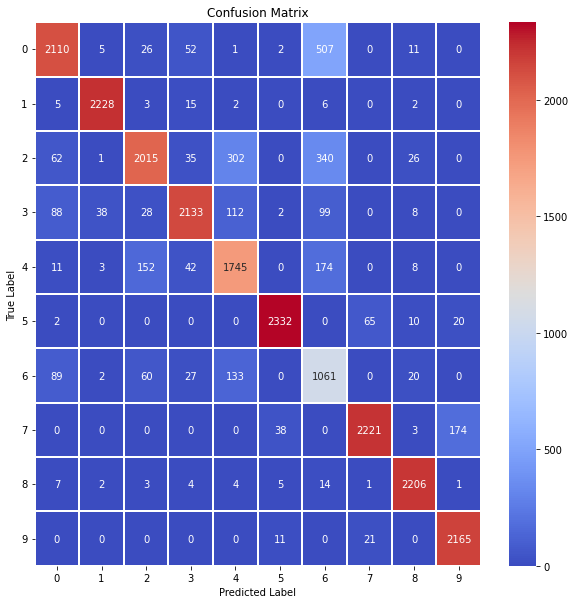

Accuracy:	0.875
Precision:	0.873
Recall:	0.876
F1:	0.87
Epoch 1/20
46/46 [==============================] - 1s 16ms/step - loss: 0.9627 - accuracy: 0.6817
Epoch 2/20
46/46 [==============================] - 1s 15ms/step - loss: 0.4893 - accuracy: 0.8260
Epoch 3/20
46/46 [==============================] - 1s 15ms/step - loss: 0.4027 - accuracy: 0.8552
Epoch 4/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3572 - accuracy: 0.8709
Epoch 5/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3292 - accuracy: 0.8807
Epoch 6/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3043 - accuracy: 0.8883
Epoch 7/20
46/46 [==============================] - 1s 15ms/step - loss: 0.2865 - accuracy: 0.8957
Epoch 8/20
46/46 [==============================] - 1s 15ms/step - loss: 0.2672 - accuracy: 0.9017
Epoch 9/20
46/46 [==============================] - 1s 15ms/step - loss: 0.2513 - accuracy: 0.9049
Epoch 10/20
46/46 [==============================] - 

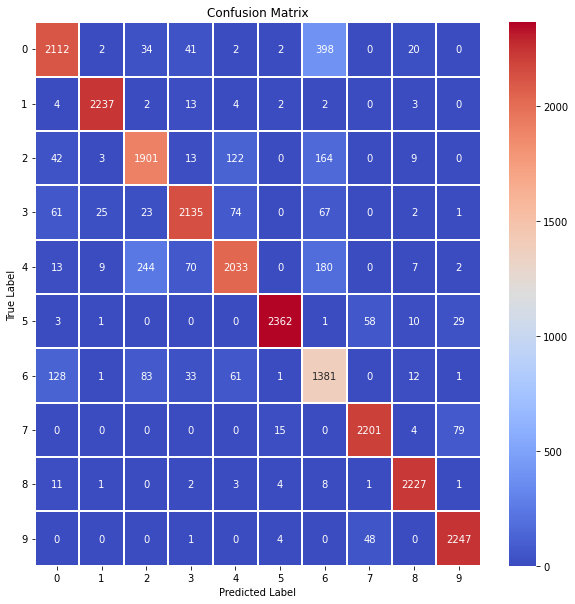

Accuracy:	0.902
Precision:	0.9
Recall:	0.902
F1:	0.899
Epoch 1/20
46/46 [==============================] - 2s 33ms/step - loss: 1.0629 - accuracy: 0.6230
Epoch 2/20
46/46 [==============================] - 1s 29ms/step - loss: 0.5496 - accuracy: 0.7961
Epoch 3/20
46/46 [==============================] - 1s 29ms/step - loss: 0.4597 - accuracy: 0.8301
Epoch 4/20
46/46 [==============================] - 1s 29ms/step - loss: 0.4015 - accuracy: 0.8531
Epoch 5/20
46/46 [==============================] - 1s 29ms/step - loss: 0.3577 - accuracy: 0.8673
Epoch 6/20
46/46 [==============================] - 1s 29ms/step - loss: 0.3322 - accuracy: 0.8759
Epoch 7/20
46/46 [==============================] - 1s 29ms/step - loss: 0.3092 - accuracy: 0.8845
Epoch 8/20
46/46 [==============================] - 1s 29ms/step - loss: 0.2900 - accuracy: 0.8920
Epoch 9/20
46/46 [==============================] - 1s 29ms/step - loss: 0.2766 - accuracy: 0.8964
Epoch 10/20
46/46 [==============================] - 1

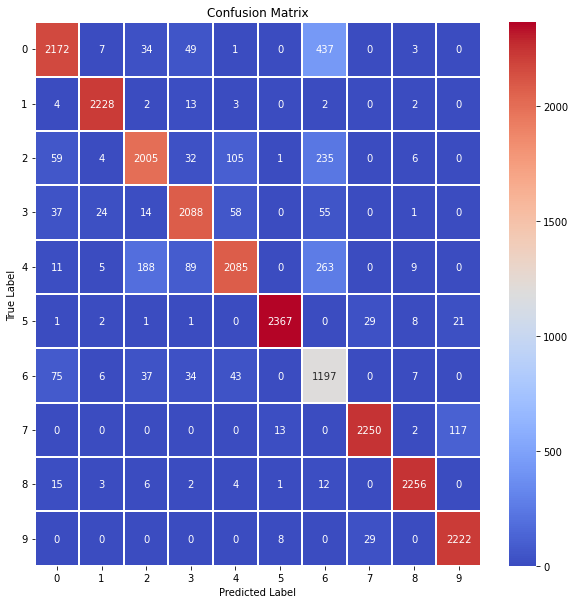

Accuracy:	0.903
Precision:	0.901
Recall:	0.905
F1:	0.899
Epoch 1/40
46/46 [==============================] - 1s 12ms/step - loss: 1.0022 - accuracy: 0.6544
Epoch 2/40
46/46 [==============================] - 1s 12ms/step - loss: 0.5488 - accuracy: 0.7999
Epoch 3/40
46/46 [==============================] - 1s 12ms/step - loss: 0.4445 - accuracy: 0.8384
Epoch 4/40
46/46 [==============================] - 1s 12ms/step - loss: 0.3967 - accuracy: 0.8571
Epoch 5/40
46/46 [==============================] - 1s 12ms/step - loss: 0.3646 - accuracy: 0.8684
Epoch 6/40
46/46 [==============================] - 1s 12ms/step - loss: 0.3412 - accuracy: 0.8764
Epoch 7/40
46/46 [==============================] - 1s 12ms/step - loss: 0.3243 - accuracy: 0.8814
Epoch 8/40
46/46 [==============================] - 1s 12ms/step - loss: 0.3076 - accuracy: 0.8877
Epoch 9/40
46/46 [==============================] - 1s 12ms/step - loss: 0.2938 - accuracy: 0.8928
Epoch 10/40
46/46 [==============================] -

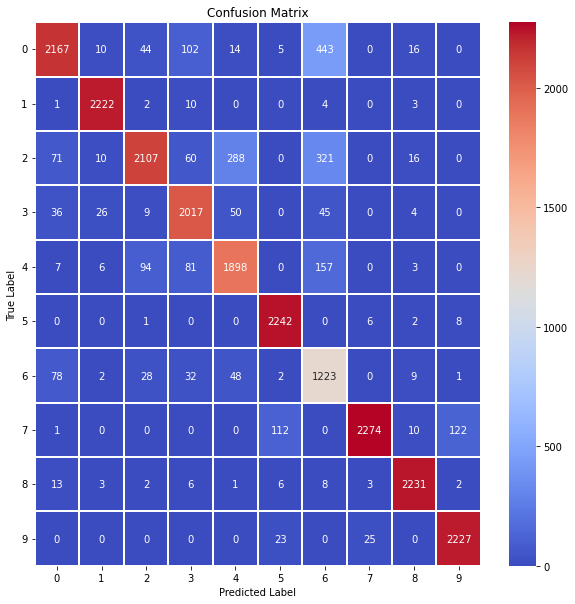

Accuracy:	0.892
Precision:	0.89
Recall:	0.898
F1:	0.889
Epoch 1/40
46/46 [==============================] - 1s 18ms/step - loss: 1.1557 - accuracy: 0.5967
Epoch 2/40
46/46 [==============================] - 1s 15ms/step - loss: 0.6530 - accuracy: 0.7531
Epoch 3/40
46/46 [==============================] - 1s 16ms/step - loss: 0.5540 - accuracy: 0.7912
Epoch 4/40
46/46 [==============================] - 1s 20ms/step - loss: 0.5037 - accuracy: 0.8146
Epoch 5/40
46/46 [==============================] - 1s 19ms/step - loss: 0.4620 - accuracy: 0.8288
Epoch 6/40
46/46 [==============================] - 1s 15ms/step - loss: 0.4383 - accuracy: 0.8386
Epoch 7/40
46/46 [==============================] - 1s 15ms/step - loss: 0.4146 - accuracy: 0.8474
Epoch 8/40
46/46 [==============================] - 1s 15ms/step - loss: 0.3933 - accuracy: 0.8547
Epoch 9/40
46/46 [==============================] - 1s 16ms/step - loss: 0.3772 - accuracy: 0.8602
Epoch 10/40
46/46 [==============================] - 

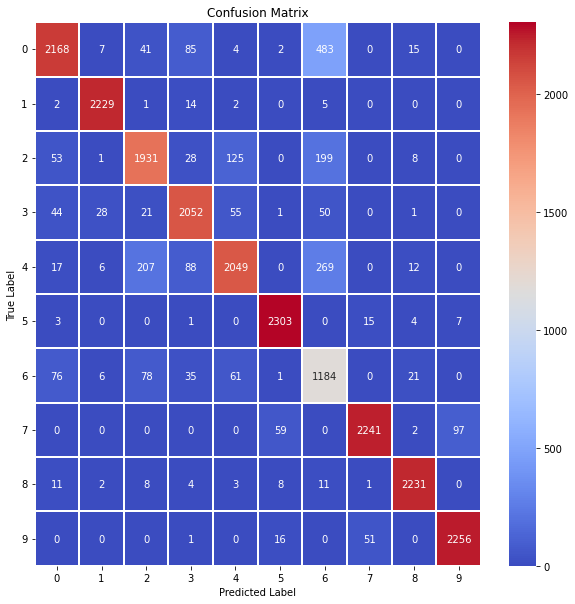

Accuracy:	0.894
Precision:	0.892
Recall:	0.895
F1:	0.89
Epoch 1/40
46/46 [==============================] - 1s 15ms/step - loss: 0.9901 - accuracy: 0.6548
Epoch 2/40
46/46 [==============================] - 1s 16ms/step - loss: 0.5499 - accuracy: 0.8042
Epoch 3/40
46/46 [==============================] - 1s 16ms/step - loss: 0.4567 - accuracy: 0.8371
Epoch 4/40
46/46 [==============================] - 1s 16ms/step - loss: 0.4033 - accuracy: 0.8551
Epoch 5/40
46/46 [==============================] - 1s 16ms/step - loss: 0.3676 - accuracy: 0.8687
Epoch 6/40
46/46 [==============================] - 1s 16ms/step - loss: 0.3424 - accuracy: 0.8761
Epoch 7/40
46/46 [==============================] - 1s 16ms/step - loss: 0.3249 - accuracy: 0.8824
Epoch 8/40
46/46 [==============================] - 1s 15ms/step - loss: 0.3073 - accuracy: 0.8894
Epoch 9/40
46/46 [==============================] - 1s 15ms/step - loss: 0.2946 - accuracy: 0.8921
Epoch 10/40
46/46 [==============================] - 

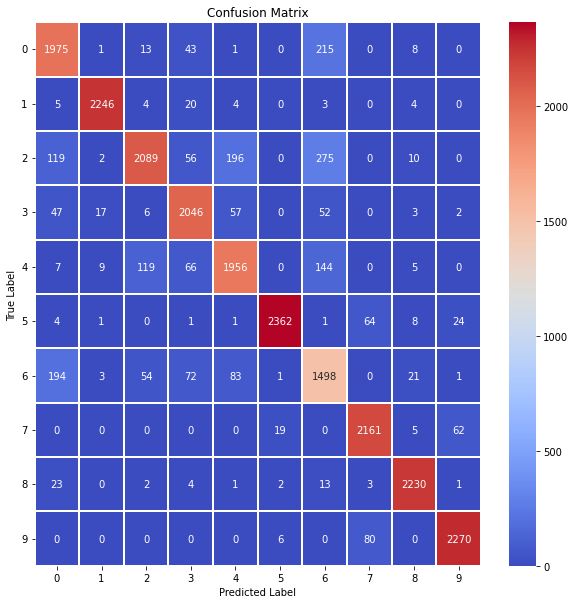

Accuracy:	0.902
Precision:	0.901
Recall:	0.902
F1:	0.9
Epoch 1/40
46/46 [==============================] - 2s 32ms/step - loss: 1.0580 - accuracy: 0.6200
Epoch 2/40
46/46 [==============================] - 1s 29ms/step - loss: 0.5585 - accuracy: 0.7971
Epoch 3/40
46/46 [==============================] - 1s 29ms/step - loss: 0.4543 - accuracy: 0.8364
Epoch 4/40
46/46 [==============================] - 1s 30ms/step - loss: 0.4001 - accuracy: 0.8566
Epoch 5/40
46/46 [==============================] - 1s 30ms/step - loss: 0.3651 - accuracy: 0.8679
Epoch 6/40
46/46 [==============================] - 1s 29ms/step - loss: 0.3422 - accuracy: 0.8750
Epoch 7/40
46/46 [==============================] - 1s 30ms/step - loss: 0.3239 - accuracy: 0.8806
Epoch 8/40
46/46 [==============================] - 1s 30ms/step - loss: 0.3044 - accuracy: 0.8880
Epoch 9/40
46/46 [==============================] - 1s 30ms/step - loss: 0.2907 - accuracy: 0.8920
Epoch 10/40
46/46 [==============================] - 1

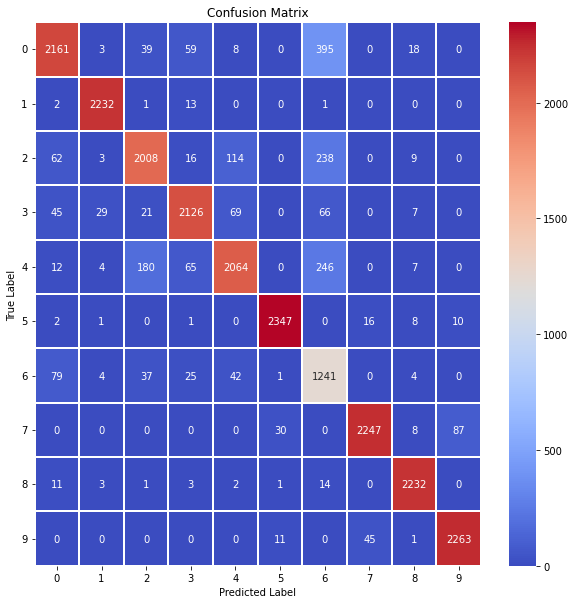

Accuracy:	0.906
Precision:	0.904
Recall:	0.908
F1:	0.902


In [32]:
for cname in configurations:
  results = perform_test(X_train, y_train, X_test, y_test, **configurations[cname])
  print(f'--- {cname} ---')
  # show results
  show_confusion_matrix(results['confusion_matrix'])
  print(f'Accuracy:\t{results["accuracy"]:.3}')
  print(f'Precision:\t{results["precision"]:.3}')
  print(f'Recall:\t{results["recall"]:.3}')
  print(f'F1:\t{results["f1"]:.3}')

**TODO 3.3.3** Prepare 7 (**seven**) configurations adding **at least** two new NN models and perform tests. Try to outperform the results obtained with the sample code.  

Present the results in the form of a table. A table can be entered as a markdown: [see the table generator](https://www.tablesgenerator.com/markdown_tables#). As an alternative, you may load data to Pandas DataFrame and display using df.head(). 

| Configuration     | Model name | Hiperparameters               | Accuracy | Precision | Recall | F1    |
|-------------------|------------|-------------------------------|----------|-----------|--------|-------|
| 1st configuration |   model_0  |  epochs=20 learning_rate=0.01 |   0.894  |   0.892   |  0.894 | 0.881 |
| 2nd configuration |   model_1  |  epochs=20 learning_rate=0.01 |   0.877  |   0.874   |  0.876 | 0.871 |
| 3rd configuration |   model_2  |  epochs=20 learning_rate=0.01 |   0.899  |   0.897   |  0.899 | 0.895 |
| 4th configuration |   model_3  |  epochs=20 learning_rate=0.01 |   0.911  |   0.909   |  0.910 | 0.909 |
| 5th configuration |   model_0  | epochs=40 learning_rate=0.005 |   0.883  |   0.881   |  0.895 | 0.877 |
| 6th configuration |   model_1  | epochs=40 learning_rate=0.005 |   0.891  |   0.889   |  0.893 | 0.888 |
| 7th configuration |   model_2  | epochs=40 learning_rate=0.005 |   0.904  |   0.902   |  0.904 | 0.902 |
| 8th configuration |   model_3  | epochs=40 learning_rate=0.005 |   0.912  |   0.911   |  0.912 | 0.911 |

Hiperparameters can be placed in seperate columns...

# 3.4 Cross validation

 

In [33]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

We define a code that uses StratifiedKFold class to perform k-fold cross validation. Stratified - means preserving proportions of strata, i.e. class labels. 

The cross validation will be performed only on the training set. Then the model will be tested on the training set

## Cross validation

In [34]:
from sklearn.model_selection import StratifiedKFold, train_test_split

n_splits = 5
random_state =  123
config = configurations['1st configuration']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold, y_train_fold, X_test_fold, y_test_fold, **config)
  
  for k in results:
    if k=='model':
      continue 
    rlist = cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k] = rlist 


============= Fold#1 =============
Epoch 1/20
47/47 [==============================] - 1s 14ms/step - loss: 32.1969 - accuracy: 0.5697
Epoch 2/20
47/47 [==============================] - 1s 11ms/step - loss: 0.7888 - accuracy: 0.7786
Epoch 3/20
47/47 [==============================] - 1s 11ms/step - loss: 0.5152 - accuracy: 0.8279
Epoch 4/20
47/47 [==============================] - 1s 11ms/step - loss: 0.4366 - accuracy: 0.8448
Epoch 5/20
47/47 [==============================] - 1s 11ms/step - loss: 0.3944 - accuracy: 0.8572
Epoch 6/20
47/47 [==============================] - 1s 11ms/step - loss: 0.3617 - accuracy: 0.8674
Epoch 7/20
47/47 [==============================] - 1s 11ms/step - loss: 0.3332 - accuracy: 0.8766
Epoch 8/20
47/47 [==============================] - 1s 11ms/step - loss: 0.3234 - accuracy: 0.8815
Epoch 9/20
47/47 [==============================] - 1s 11ms/step - loss: 0.2915 - accuracy: 0.8895
Epoch 10/20
47/47 [==============================] - 0s 11ms/step - loss:

**TODO 3.4.1** Process the data from cv_results to display average scores and aggregated confussion matrix. In the provided code sample pandas DataFrame is used, however, it can be achieved in many other ways, e.g. by converting lists to numpy arrays.

In [35]:
# display results
import pandas as pd

df = pd.DataFrame(cv_results)
df.head()

,confusion_matrix,accuracy,precision,recall,f1
0,"[[1078, 11, 28, 57, 3, 1, 251, 0, 11, 0], [2, ...",0.860250,0.860250,0.864036,0.858364
1,"[[857, 3, 7, 17, 2, 0, 113, 0, 1, 0], [6, 1161...",0.863000,0.863000,0.867691,0.863858
2,"[[960, 7, 8, 42, 1, 0, 160, 1, 13, 0], [4, 114...",0.864833,0.864833,0.865291,0.863677
3,"[[883, 2, 16, 28, 3, 1, 87, 0, 6, 0], [5, 1174...",0.867333,0.867333,0.873577,0.867613
4,"[[811, 2, 15, 19, 6, 1, 73, 1, 1, 1], [10, 118...",0.849500,0.849500,0.865012,0.851408


In [36]:
# Compute avarage scores
print("Average scores:")
print(f'Accuracy: {df.accuracy.mean():.3}')
print(f'Precision: {df.precision.mean():.3}')
print(f'Recall: {df.recall.mean():.3}')
print(f'F1: {df.f1.mean():.3}')

Average scores:
Accuracy: 0.861
Precision: 0.861
Recall: 0.867
F1: 0.861


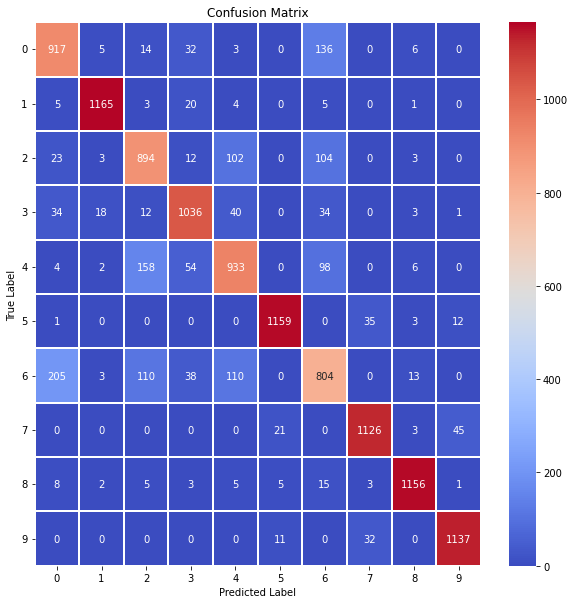

In [37]:
# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = df.confusion_matrix.mean().astype(int)
show_confusion_matrix(cm)

**TODO 3.4.2** Perform the above experiments using **three** best configurations (based on train-test procedure. Compare results obtained by testing and cross-validation. 

============= Fold#1 =============
Epoch 1/20
47/47 [==============================] - 2s 30ms/step - loss: 15.4047 - accuracy: 0.5837
Epoch 2/20
47/47 [==============================] - 1s 27ms/step - loss: 0.6770 - accuracy: 0.7613
Epoch 3/20
47/47 [==============================] - 1s 30ms/step - loss: 1.6217 - accuracy: 0.7571
Epoch 4/20
47/47 [==============================] - 1s 27ms/step - loss: 0.5011 - accuracy: 0.8125
Epoch 5/20
47/47 [==============================] - 1s 27ms/step - loss: 0.5110 - accuracy: 0.8116
Epoch 6/20
47/47 [==============================] - 1s 27ms/step - loss: 0.4678 - accuracy: 0.8251
Epoch 7/20
47/47 [==============================] - 1s 27ms/step - loss: 0.5849 - accuracy: 0.8289
Epoch 8/20
47/47 [==============================] - 1s 27ms/step - loss: 0.4065 - accuracy: 0.8445
Epoch 9/20
47/47 [==============================] - 1s 27ms/step - loss: 0.4081 - accuracy: 0.8446
Epoch 10/20
47/47 [==============================] - 1s 27ms/step - loss:

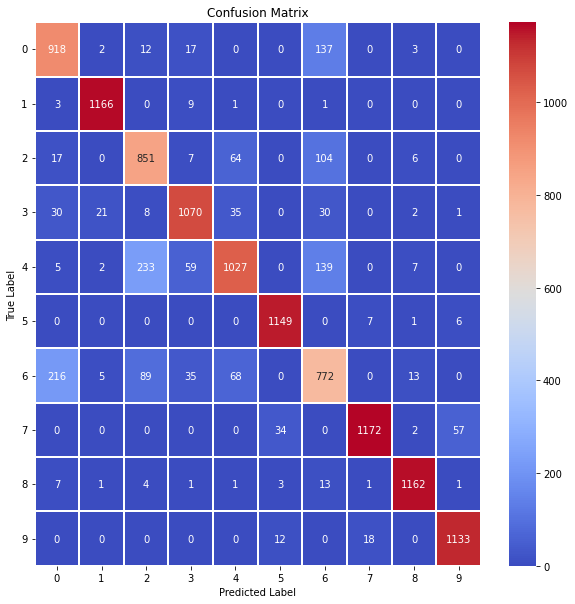

In [38]:
n_splits = 5
random_state =  123
config = configurations['4th configuration']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold, y_train_fold, X_test_fold, y_test_fold, **config)
  
  for k in results:
    if k=='model':
      continue 
    rlist = cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k] = rlist 

df = pd.DataFrame(cv_results)

# Compute avarage scores
print("Average scores:")
print(f'Accuracy: {df.accuracy.mean():.3}')
print(f'Precision: {df.precision.mean():.3}')
print(f'Recall: {df.recall.mean():.3}')
print(f'F1: {df.f1.mean():.3}')

# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = df.confusion_matrix.mean().astype(int)
show_confusion_matrix(cm)

============= Fold#1 =============
Epoch 1/40
47/47 [==============================] - 1s 18ms/step - loss: 16.6547 - accuracy: 0.5317
Epoch 2/40
47/47 [==============================] - 1s 14ms/step - loss: 0.9035 - accuracy: 0.6599
Epoch 3/40
47/47 [==============================] - 1s 14ms/step - loss: 0.5983 - accuracy: 0.7804
Epoch 4/40
47/47 [==============================] - 1s 14ms/step - loss: 0.4613 - accuracy: 0.8312
Epoch 5/40
47/47 [==============================] - 1s 14ms/step - loss: 0.3845 - accuracy: 0.8568
Epoch 6/40
47/47 [==============================] - 1s 14ms/step - loss: 0.3532 - accuracy: 0.8694
Epoch 7/40
47/47 [==============================] - 1s 14ms/step - loss: 0.3239 - accuracy: 0.8765
Epoch 8/40
47/47 [==============================] - 1s 14ms/step - loss: 0.3105 - accuracy: 0.8826
Epoch 9/40
47/47 [==============================] - 1s 14ms/step - loss: 0.2848 - accuracy: 0.8917
Epoch 10/40
47/47 [==============================] - 1s 18ms/step - loss:

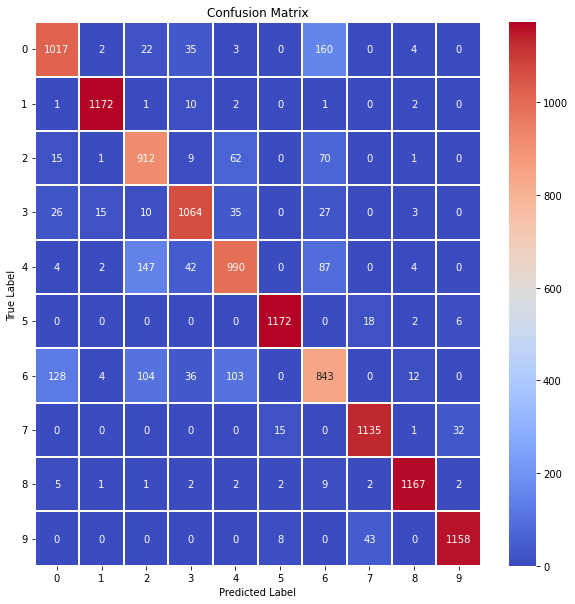

In [39]:
n_splits = 5
random_state =  123
config = configurations['7th configuration']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold, y_train_fold, X_test_fold, y_test_fold, **config)
  
  for k in results:
    if k=='model':
      continue 
    rlist = cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k] = rlist 

df = pd.DataFrame(cv_results)

# Compute avarage scores
print("Average scores:")
print(f'Accuracy: {df.accuracy.mean():.3}')
print(f'Precision: {df.precision.mean():.3}')
print(f'Recall: {df.recall.mean():.3}')
print(f'F1: {df.f1.mean():.3}')

# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = df.confusion_matrix.mean().astype(int)
show_confusion_matrix(cm)

============= Fold#1 =============
Epoch 1/40
47/47 [==============================] - 2s 27ms/step - loss: 8.6874 - accuracy: 0.6244
Epoch 2/40
47/47 [==============================] - 1s 28ms/step - loss: 0.5991 - accuracy: 0.7816
Epoch 3/40
47/47 [==============================] - 1s 27ms/step - loss: 0.5208 - accuracy: 0.8068
Epoch 4/40
47/47 [==============================] - 1s 28ms/step - loss: 0.4638 - accuracy: 0.8280
Epoch 5/40
47/47 [==============================] - 1s 27ms/step - loss: 0.4110 - accuracy: 0.8475
Epoch 6/40
47/47 [==============================] - 1s 28ms/step - loss: 0.3849 - accuracy: 0.8558
Epoch 7/40
47/47 [==============================] - 1s 27ms/step - loss: 0.3486 - accuracy: 0.8682
Epoch 8/40
47/47 [==============================] - 1s 28ms/step - loss: 0.3414 - accuracy: 0.8708
Epoch 9/40
47/47 [==============================] - 1s 27ms/step - loss: 0.3235 - accuracy: 0.8779
Epoch 10/40
47/47 [==============================] - 1s 28ms/step - loss: 

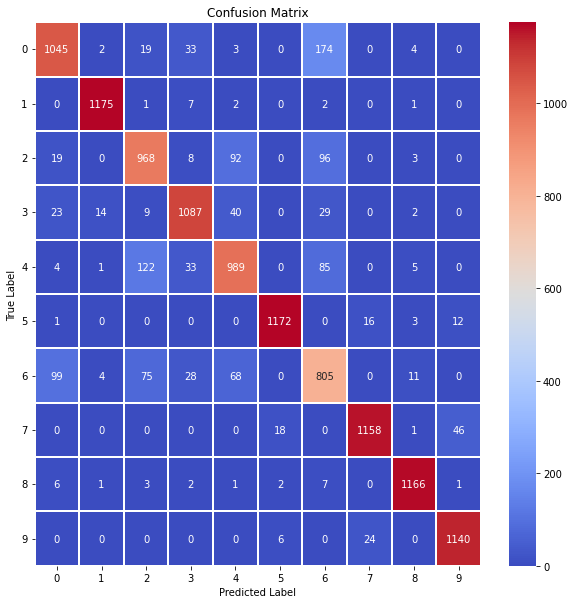

In [40]:
n_splits = 5
random_state =  123
config = configurations['8th configuration']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold, y_train_fold, X_test_fold, y_test_fold, **config)
  
  for k in results:
    if k=='model':
      continue 
    rlist = cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k] = rlist 

df = pd.DataFrame(cv_results)

# Compute avarage scores
print("Average scores:")
print(f'Accuracy: {df.accuracy.mean():.3}')
print(f'Precision: {df.precision.mean():.3}')
print(f'Recall: {df.recall.mean():.3}')
print(f'F1: {df.f1.mean():.3}')

# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = df.confusion_matrix.mean().astype(int)
show_confusion_matrix(cm)

## Testing the winning model

**TODO 3.4.3** Build a model using the winnining configuration (according to CV) and perform the final test on the delivered test set (X_test,y_test). 





In [41]:
# test based on training data
config = configurations['8th configuration'] # winning configuration
results = perform_test(X_train, y_train, X_test, y_test, **config)

Epoch 1/40
59/59 [==============================] - 3s 31ms/step - loss: 7.3971 - accuracy: 0.6462
Epoch 2/40
59/59 [==============================] - 2s 27ms/step - loss: 0.5696 - accuracy: 0.7943
Epoch 3/40
59/59 [==============================] - 2s 27ms/step - loss: 0.4938 - accuracy: 0.8171
Epoch 4/40
59/59 [==============================] - 2s 27ms/step - loss: 0.4279 - accuracy: 0.8408
Epoch 5/40
59/59 [==============================] - 2s 27ms/step - loss: 0.3971 - accuracy: 0.8509
Epoch 6/40
59/59 [==============================] - 2s 27ms/step - loss: 0.3615 - accuracy: 0.8623
Epoch 7/40
59/59 [==============================] - 2s 27ms/step - loss: 0.3430 - accuracy: 0.8704
Epoch 8/40
59/59 [==============================] - 2s 27ms/step - loss: 0.3292 - accuracy: 0.8760
Epoch 9/40
59/59 [==============================] - 2s 27ms/step - loss: 0.3095 - accuracy: 0.8833
Epoch 10/40
59/59 [==============================] - 2s 27ms/step - loss: 0.3026 - accuracy: 0.8849
Epoch 11/

Print results

In [42]:
for k in results:
  if k == 'confusion_matrix' or k=='model':
    continue
  print(f'{k}: {results[k]}')

accuracy: 0.889
precision: 0.889
recall: 0.8908040711055589
f1: 0.8894475227840222


Display the confusion matrix

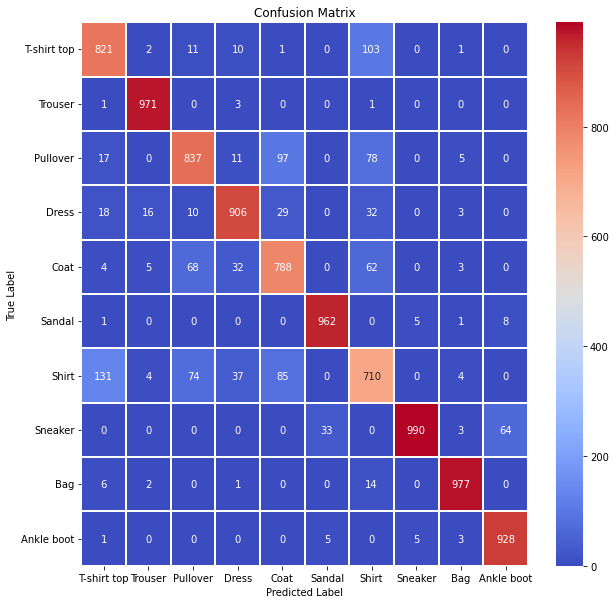

In [43]:
labels = ['T-shirt top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_confusion_matrix(results['confusion_matrix'], labels)

# 3.5 Cifar dataset

We will process Cifar dataset using a resource demanding CNN model.  

In [44]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [45]:
print(X_train.shape)

(50000, 32, 32, 3)


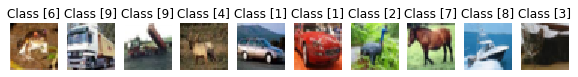

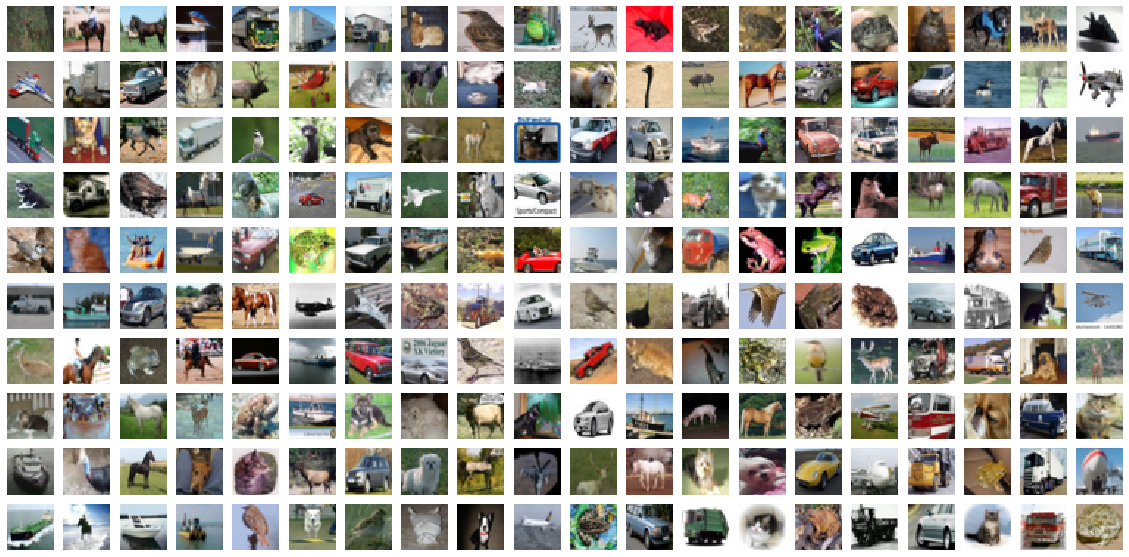

In [46]:
# Show a few sample images from the training set
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    plt.imshow(X_train[index]) # index of the sample picture
    plt.title("Class " + str(y_train[index]))
plt.show()
    
# Show a few sample digits from the training set
plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
col2 = 20
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(X_train[index]) # index of the sample picture
plt.show()

Some basic preprocessing and calculation of the input shape

In [47]:
X_train = X_train.astype('float32')   # Copy this array and cast it to a specified type
X_test = X_test.astype('float32')     # Copy this array and cast it to a specified type
X_train /= 255 # Transfrom the training data from the range of 0 and 255 to the range of 0 and 1
X_test /= 255  # Transfrom the validating data from the range of 0 and 255 to the range of 0 and 1
input_shape = X_train.shape[1:]
print(f'input shape={input_shape}')

input shape=(32, 32, 3)


Definition of CNN model

In [48]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers


num_classes = y_train.max()+1

# Define the sequential Keras model composed of a few layers
model3 = Sequential()   # establishes the type of the network model
# Conv2D - creates a convolutional layer (https://keras.io/layers/convolutional/#conv2d) with 
# filters - specified number of convolutional filters
# kernel_size - defines the frame (sliding window) size where the convolutional filter is implemented
# activation - sets the activation function for this layers, here ReLU
# input_shape - defines the shape of the input matrix (vector), here input_shape = (1, img_rows, img_cols)
model3.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D pools the max value from the frame (sliding window) of 2 x 2 size
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25)) # Implements the drop out with the probability of 0.25
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))
model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
#model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))
# Finish the convolutional model and flatten the layer which does not affect the batch size.
model3.add(Flatten())
# Use a dense layer (MLP) consisting of 256 neurons with relu activation functions
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.3))
model3.add(Dense(num_classes, activation='softmax'))

# Now print the full model and notice the number of all trainable paramters
print(model3.summary())

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                

As the number of parameters is high, training the model requires a few dozen of epochs. As an epoch may last as long as 160 sec, the training  phase may last over 2 hours

To accelerate a bit and make the whole process reliable:
*  We will train a model on a subsample of the training set and we will check scores
*  Then we will train using the full training set, in a few increments 
*  Models will be saved to be restored in the case of the seession crach

## Subsampling
We will use only 10% of data for training

In [49]:
import numpy as np

probs = np.random.rand(y_train.shape[0])

X_train_sample_10 = X_train[probs<0.1]
y_train_sample_10 = y_train[probs<0.1]

print(X_train_sample_10.shape)

(5093, 32, 32, 3)


## Model preparation

In [50]:
# from tensorflow import keras
from keras import optimizers
# dir(optimizers)
optimizer = optimizers.adam_v2.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

In [54]:
import os
if not os.path.exists('models'):
  os.mkdir('models')

## Training

In [55]:
batch_size = 512 
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample_10, y_train_sample_10, batch_size=batch_size, epochs=epochs//10, verbose=1)
  path = f'models/CNN_CIFAR-10_sub_10_{i}.h5'
  model3.save(path)

--- Increment 0 on a subsampled dataset ---
Epoch 1/5
10/10 [==============================] - 4s 210ms/step - loss: 3.3218 - accuracy: 0.1076
Epoch 2/5
10/10 [==============================] - 1s 110ms/step - loss: 2.9258 - accuracy: 0.1789
Epoch 3/5
10/10 [==============================] - 1s 110ms/step - loss: 2.6193 - accuracy: 0.2087
Epoch 4/5
10/10 [==============================] - 1s 109ms/step - loss: 2.4107 - accuracy: 0.2554
Epoch 5/5
10/10 [==============================] - 1s 110ms/step - loss: 2.2546 - accuracy: 0.2798
--- Increment 1 on a subsampled dataset ---
Epoch 1/5
10/10 [==============================] - 1s 109ms/step - loss: 2.1451 - accuracy: 0.2973
Epoch 2/5
10/10 [==============================] - 1s 114ms/step - loss: 2.0774 - accuracy: 0.3112
Epoch 3/5
10/10 [==============================] - 1s 117ms/step - loss: 1.9755 - accuracy: 0.3438
Epoch 4/5
10/10 [==============================] - 1s 113ms/step - loss: 1.8979 - accuracy: 0.3656
Epoch 5/5
10/10 [====

## Validation on the test set

**TODO 3.5.1** Display scores and the confussion matrix

Accuracy: 0.6247
Precision: 0.6247
Recall: 0.6247
F1: 0.6247


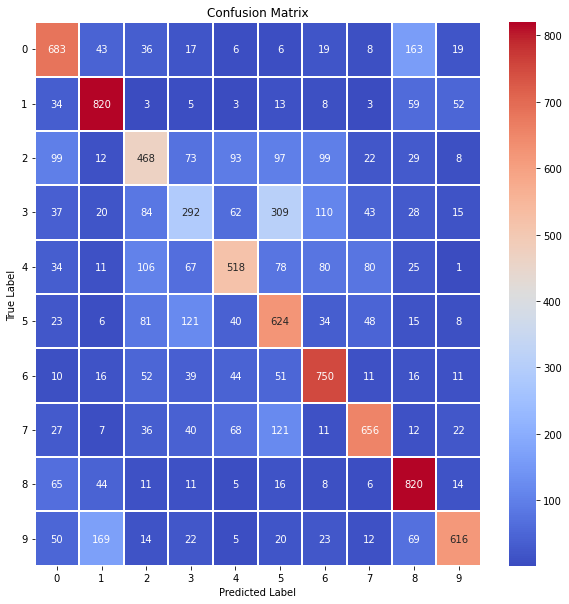

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds_10 = model3.predict(X_test)
y_pred_10 = np.argmax(preds_10, axis=1)

# print scores
print(f'Accuracy: {accuracy_score(y_test, y_pred_10)}')
print(f'Precision: {precision_score(y_test, y_pred_10, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred_10, average="micro")}')
print(f'F1: {f1_score(y_test, y_pred_10, average="micro")}')

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred_10)

## Continue training on the whole dataset

In [57]:
i=i+1
print(f'--- Increment {i} on a full dataset ---')
model3.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=1)
path = f'models/CNN_CIFAR-10_full{i}.h5'
model3.save(path)

--- Increment 10 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 115ms/step - loss: 1.3281 - accuracy: 0.6224
Epoch 2/10
98/98 [==============================] - 11s 109ms/step - loss: 1.1536 - accuracy: 0.6712
Epoch 3/10
98/98 [==============================] - 11s 108ms/step - loss: 1.0677 - accuracy: 0.6967
Epoch 4/10
98/98 [==============================] - 11s 108ms/step - loss: 1.0229 - accuracy: 0.7066
Epoch 5/10
98/98 [==============================] - 11s 108ms/step - loss: 0.9785 - accuracy: 0.7217
Epoch 6/10
98/98 [==============================] - 11s 108ms/step - loss: 0.9433 - accuracy: 0.7347
Epoch 7/10
98/98 [==============================] - 11s 109ms/step - loss: 0.9280 - accuracy: 0.7394
Epoch 8/10
98/98 [==============================] - 11s 109ms/step - loss: 0.8907 - accuracy: 0.7520
Epoch 9/10
98/98 [==============================] - 11s 108ms/step - loss: 0.8729 - accuracy: 0.7589
Epoch 10/10
98/98 [==============================] -

**TODO 3.5.2** Print scores and display confusion matrix

Accuracy: 0.7848
Precision: 0.7848
Recall: 0.7848
F1: 0.7848


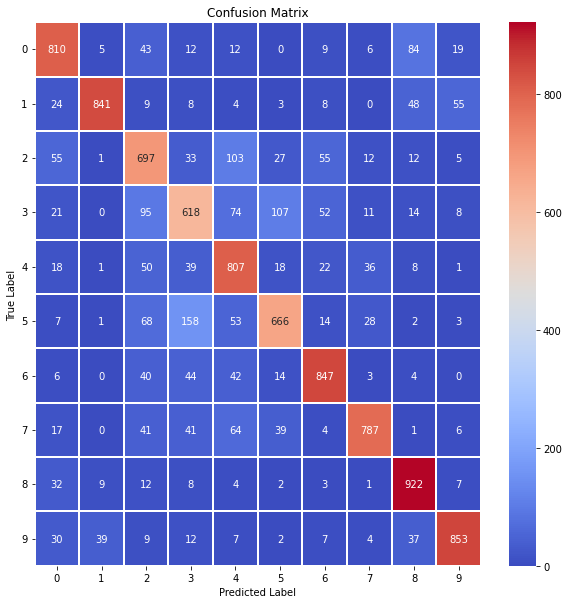

In [58]:
preds = model3.predict(X_test)
y_pred = np.argmax(preds, axis=1)

# print scores
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')
print(f'F1: {f1_score(y_test, y_pred, average="micro")}')

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred)

**TODO 3.5.3** Repeat the two above steps (training the model and testing) until satisfying results are reached. You may consider writing a loop, which terminates upon certain conditions, e.g. no improvement or reaching a desired score value

--- Increment 1 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 108ms/step - loss: 0.8352 - accuracy: 0.7742
Epoch 2/10
98/98 [==============================] - 11s 109ms/step - loss: 0.8299 - accuracy: 0.7766
Epoch 3/10
98/98 [==============================] - 11s 109ms/step - loss: 0.8116 - accuracy: 0.7851
Epoch 4/10
98/98 [==============================] - 11s 109ms/step - loss: 0.7960 - accuracy: 0.7908
Epoch 5/10
98/98 [==============================] - 11s 108ms/step - loss: 0.7985 - accuracy: 0.7902
Epoch 6/10
98/98 [==============================] - 11s 109ms/step - loss: 0.7852 - accuracy: 0.7933
Epoch 7/10
98/98 [==============================] - 11s 108ms/step - loss: 0.7700 - accuracy: 0.7992
Epoch 8/10
98/98 [==============================] - 11s 108ms/step - loss: 0.7625 - accuracy: 0.8033
Epoch 9/10
98/98 [==============================] - 11s 108ms/step - loss: 0.7489 - accuracy: 0.8078
Epoch 10/10
98/98 [==============================] - 

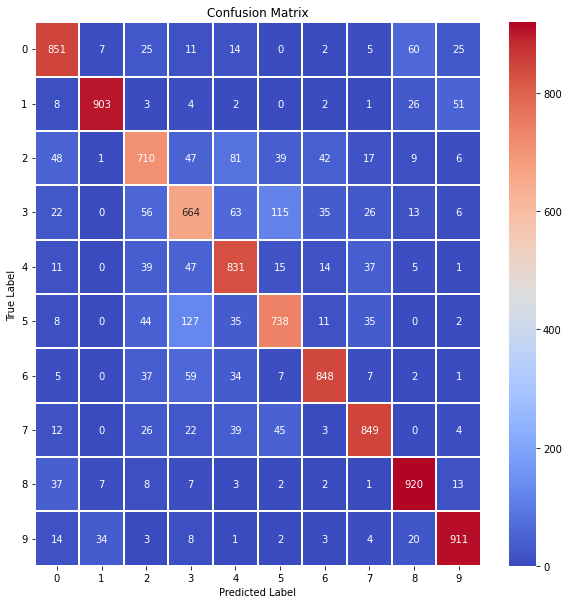

--- Increment 2 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 108ms/step - loss: 0.7318 - accuracy: 0.8156
Epoch 2/10
98/98 [==============================] - 11s 109ms/step - loss: 0.7342 - accuracy: 0.8133
Epoch 3/10
98/98 [==============================] - 11s 108ms/step - loss: 0.7272 - accuracy: 0.8167
Epoch 4/10
98/98 [==============================] - 11s 109ms/step - loss: 0.7164 - accuracy: 0.8198
Epoch 5/10
98/98 [==============================] - 11s 109ms/step - loss: 0.7118 - accuracy: 0.8232
Epoch 6/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6909 - accuracy: 0.8287
Epoch 7/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6895 - accuracy: 0.8303
Epoch 8/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6872 - accuracy: 0.8314
Epoch 9/10
98/98 [==============================] - 11s 108ms/step - loss: 0.6945 - accuracy: 0.8287
Epoch 10/10
98/98 [==============================] - 

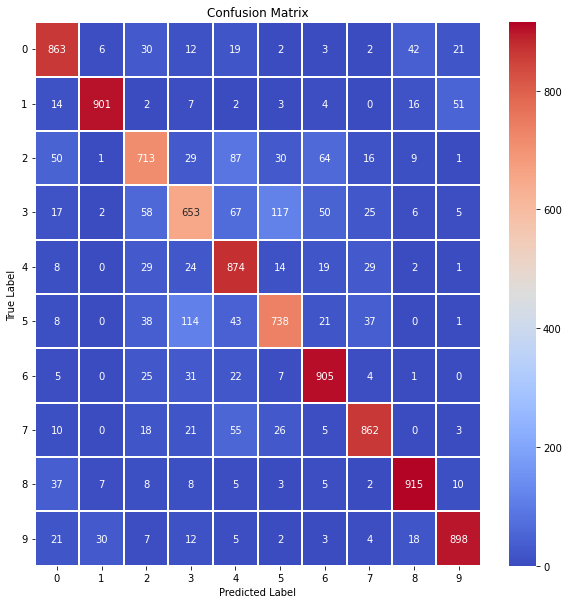

--- Increment 3 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6772 - accuracy: 0.8364
Epoch 2/10
98/98 [==============================] - 11s 108ms/step - loss: 0.6668 - accuracy: 0.8382
Epoch 3/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6619 - accuracy: 0.8393
Epoch 4/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6609 - accuracy: 0.8414
Epoch 5/10
98/98 [==============================] - 11s 108ms/step - loss: 0.6564 - accuracy: 0.8438
Epoch 6/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6515 - accuracy: 0.8458
Epoch 7/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6472 - accuracy: 0.8484
Epoch 8/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6464 - accuracy: 0.8455
Epoch 9/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6380 - accuracy: 0.8498
Epoch 10/10
98/98 [==============================] - 

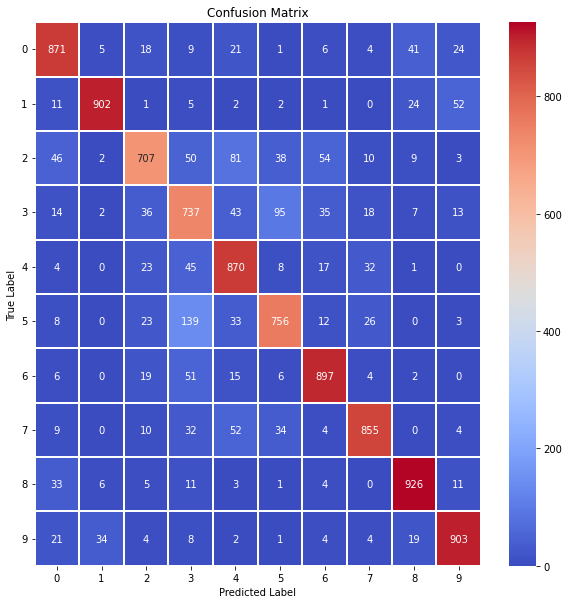

--- Increment 4 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 108ms/step - loss: 0.6297 - accuracy: 0.8541
Epoch 2/10
98/98 [==============================] - 11s 108ms/step - loss: 0.6286 - accuracy: 0.8538
Epoch 3/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6331 - accuracy: 0.8519
Epoch 4/10
98/98 [==============================] - 11s 109ms/step - loss: 0.6278 - accuracy: 0.8552
Epoch 5/10
98/98 [==============================] - 11s 111ms/step - loss: 0.6173 - accuracy: 0.8590
Epoch 6/10
98/98 [==============================] - 11s 110ms/step - loss: 0.6173 - accuracy: 0.8585
Epoch 7/10
98/98 [==============================] - 11s 110ms/step - loss: 0.6181 - accuracy: 0.8578
Epoch 8/10
98/98 [==============================] - 11s 110ms/step - loss: 0.6130 - accuracy: 0.8615
Epoch 9/10
98/98 [==============================] - 11s 110ms/step - loss: 0.6128 - accuracy: 0.8602
Epoch 10/10
98/98 [==============================] - 

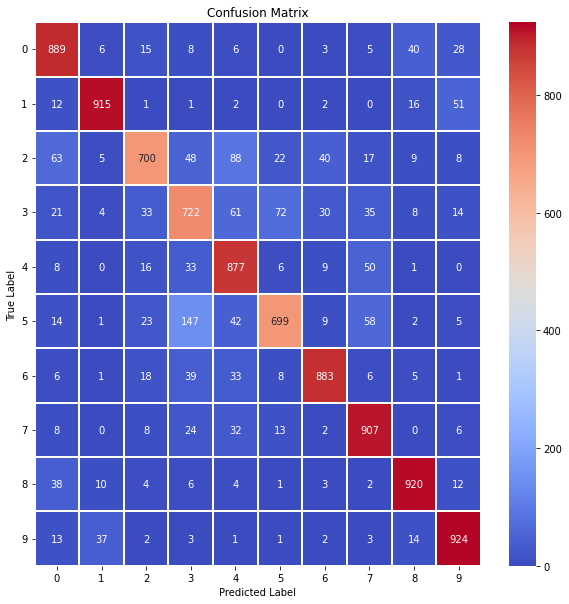

--- Increment 5 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 110ms/step - loss: 0.6110 - accuracy: 0.8609
Epoch 2/10
98/98 [==============================] - 11s 110ms/step - loss: 0.6000 - accuracy: 0.8653
Epoch 3/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5996 - accuracy: 0.8650
Epoch 4/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5901 - accuracy: 0.8678
Epoch 5/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5965 - accuracy: 0.8670
Epoch 6/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5883 - accuracy: 0.8679
Epoch 7/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5884 - accuracy: 0.8688
Epoch 8/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5864 - accuracy: 0.8701
Epoch 9/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5849 - accuracy: 0.8700
Epoch 10/10
98/98 [==============================] - 

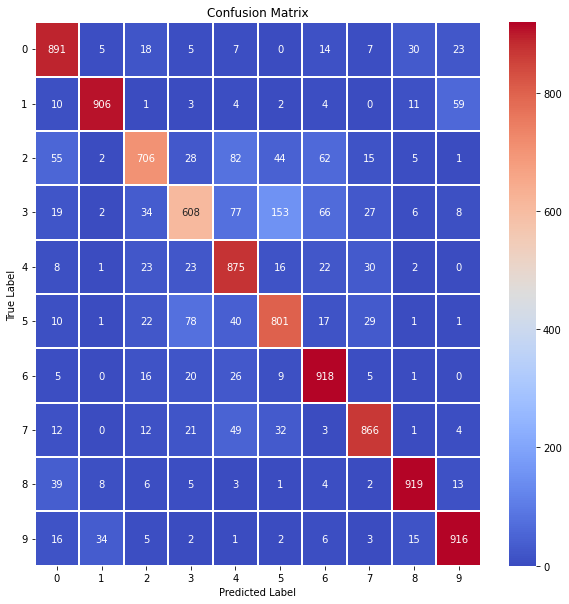

--- Increment 6 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5879 - accuracy: 0.8691
Epoch 2/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5766 - accuracy: 0.8731
Epoch 3/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5722 - accuracy: 0.8736
Epoch 4/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5790 - accuracy: 0.8735
Epoch 5/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5765 - accuracy: 0.8727
Epoch 6/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5693 - accuracy: 0.8753
Epoch 7/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5734 - accuracy: 0.8741
Epoch 8/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5719 - accuracy: 0.8742
Epoch 9/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5653 - accuracy: 0.8765
Epoch 10/10
98/98 [==============================] - 

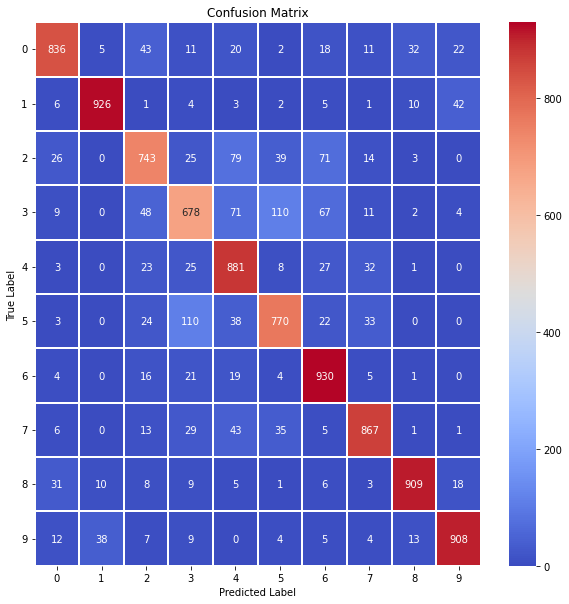

--- Increment 7 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5550 - accuracy: 0.8794
Epoch 2/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5590 - accuracy: 0.8798
Epoch 3/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5546 - accuracy: 0.8802
Epoch 4/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5585 - accuracy: 0.8788
Epoch 5/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5581 - accuracy: 0.8791
Epoch 6/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5523 - accuracy: 0.8814
Epoch 7/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5485 - accuracy: 0.8813
Epoch 8/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5515 - accuracy: 0.8800
Epoch 9/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5539 - accuracy: 0.8797
Epoch 10/10
98/98 [==============================] - 

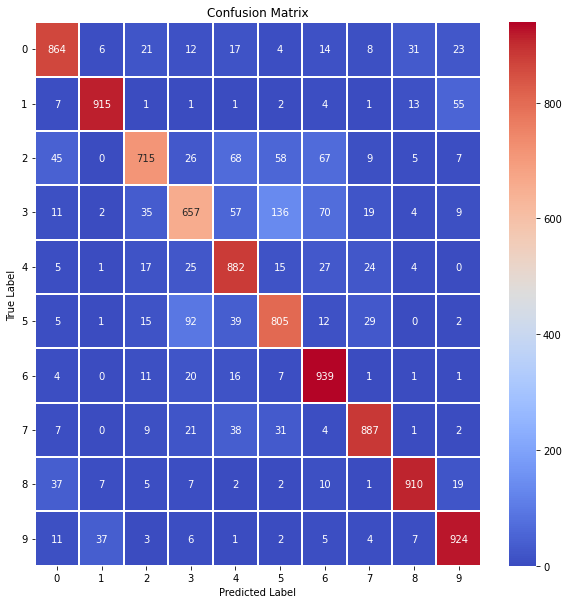

--- Increment 8 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5509 - accuracy: 0.8819
Epoch 2/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5405 - accuracy: 0.8853
Epoch 3/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5497 - accuracy: 0.8834
Epoch 4/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5335 - accuracy: 0.8876
Epoch 5/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5370 - accuracy: 0.8855
Epoch 6/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5354 - accuracy: 0.8868
Epoch 7/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5460 - accuracy: 0.8835
Epoch 8/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5431 - accuracy: 0.8846
Epoch 9/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5360 - accuracy: 0.8858
Epoch 10/10
98/98 [==============================] - 

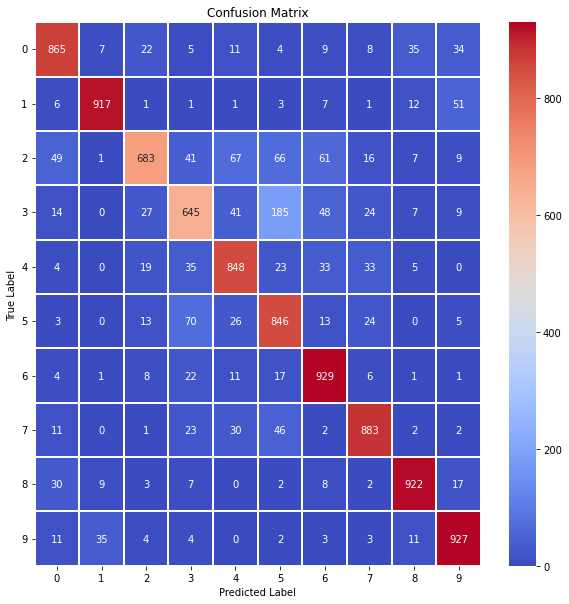

--- Increment 9 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5319 - accuracy: 0.8878
Epoch 2/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5319 - accuracy: 0.8886
Epoch 3/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5302 - accuracy: 0.8897
Epoch 4/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5365 - accuracy: 0.8863
Epoch 5/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5313 - accuracy: 0.8893
Epoch 6/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5247 - accuracy: 0.8922
Epoch 7/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5293 - accuracy: 0.8884
Epoch 8/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5217 - accuracy: 0.8918
Epoch 9/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5233 - accuracy: 0.8902
Epoch 10/10
98/98 [==============================] - 

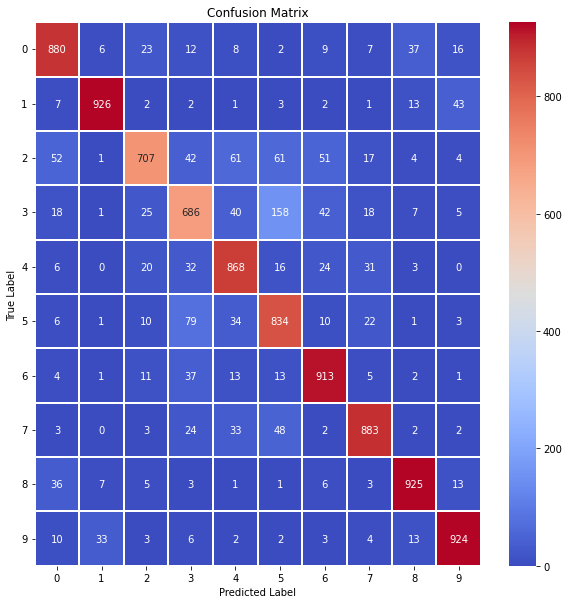

--- Increment 10 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5189 - accuracy: 0.8937
Epoch 2/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5241 - accuracy: 0.8909
Epoch 3/10
98/98 [==============================] - 11s 113ms/step - loss: 0.5281 - accuracy: 0.8906
Epoch 4/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5229 - accuracy: 0.8902
Epoch 5/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5174 - accuracy: 0.8930
Epoch 6/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5195 - accuracy: 0.8920
Epoch 7/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5201 - accuracy: 0.8928
Epoch 8/10
98/98 [==============================] - 11s 111ms/step - loss: 0.5151 - accuracy: 0.8921
Epoch 9/10
98/98 [==============================] - 11s 110ms/step - loss: 0.5286 - accuracy: 0.8890
Epoch 10/10
98/98 [==============================] -

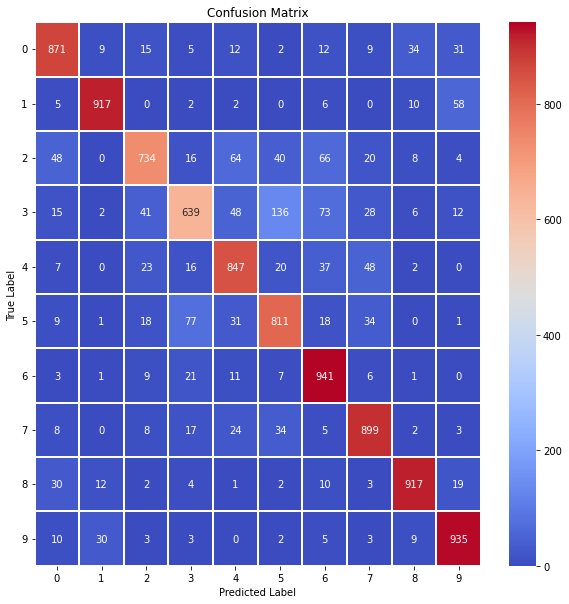

In [59]:
i=0

while True:
  i=i+1
  print(f'--- Increment {i} on a full dataset ---')
  model3.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=1)
  path = f'models/CNN_CIFAR-10_full{i}.h5'
  model3.save(path)

  preds = model3.predict(X_test)
  y_pred = np.argmax(preds, axis=1)

  # print scores
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
  print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')
  print(f'F1: {f1_score(y_test, y_pred, average="micro")}')

  # display confusion matrix
  compute_and_show_confusion_matrix(y_test, y_pred)

  if accuracy_score(y_test, y_pred) >= 0.95 or i == 10:
    break

**TODO 3.5.4** Perform an experiment, during which models are trained using:
*  10% of data (done)
*  25% of data 
*  50% of data
*  75% of data
*  100% of data (done)

Display plots showing differences between the classification scores

In [60]:
probs = np.random.rand(y_train.shape[0])

X_train_sample_25 = X_train[probs<0.25]
y_train_sample_25 =y_train[probs<0.25]

probs = np.random.rand(y_train.shape[0])

X_train_sample_50 = X_train[probs<0.5]
y_train_sample_50 =y_train[probs<0.5]

probs = np.random.rand(y_train.shape[0])

X_train_sample_75 = X_train[probs<0.75]
y_train_sample_75 =y_train[probs<0.75]

--- Increment 0 on a subsampled dataset ---
Epoch 1/12
25/25 [==============================] - 3s 126ms/step - loss: 0.5095 - accuracy: 0.8954
Epoch 2/12
25/25 [==============================] - 3s 106ms/step - loss: 0.4979 - accuracy: 0.9011
Epoch 3/12
25/25 [==============================] - 3s 106ms/step - loss: 0.4905 - accuracy: 0.9042
Epoch 4/12
25/25 [==============================] - 3s 105ms/step - loss: 0.4600 - accuracy: 0.9139
Epoch 5/12
25/25 [==============================] - 3s 106ms/step - loss: 0.4578 - accuracy: 0.9139
Epoch 6/12
25/25 [==============================] - 3s 107ms/step - loss: 0.4435 - accuracy: 0.9198
Epoch 7/12
25/25 [==============================] - 3s 107ms/step - loss: 0.4635 - accuracy: 0.9136
Epoch 8/12
25/25 [==============================] - 3s 106ms/step - loss: 0.4535 - accuracy: 0.9171
Epoch 9/12
25/25 [==============================] - 3s 107ms/step - loss: 0.4249 - accuracy: 0.9265
Epoch 10/12
25/25 [==============================] - 3s 

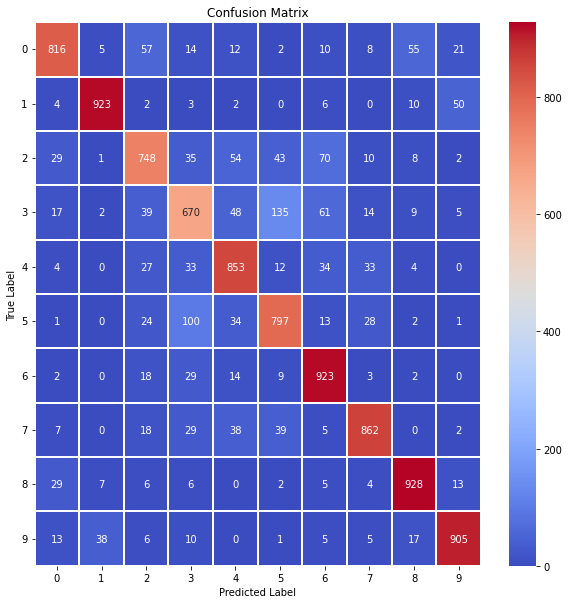

In [61]:
for i in range(4):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample_25, y_train_sample_25, batch_size=batch_size, epochs=epochs//4, verbose=1)
  path = f'models/CNN_CIFAR-10_sub_25_{i}.h5'
  model3.save(path)

preds_25 = model3.predict(X_test)
y_pred_25 = np.argmax(preds_25, axis=1)

# print scores
print(f'Accuracy: {accuracy_score(y_test, y_pred_25)}')
print(f'Precision: {precision_score(y_test, y_pred_25, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred_25, average="micro")}')
print(f'F1: {f1_score(y_test, y_pred_25, average="micro")}')

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred_25)

--- Increment 0 on a subsampled dataset ---
Epoch 1/25
49/49 [==============================] - 6s 120ms/step - loss: 0.6275 - accuracy: 0.8675
Epoch 2/25
49/49 [==============================] - 5s 108ms/step - loss: 0.5704 - accuracy: 0.8841
Epoch 3/25
49/49 [==============================] - 5s 108ms/step - loss: 0.5385 - accuracy: 0.8933
Epoch 4/25
49/49 [==============================] - 5s 108ms/step - loss: 0.5244 - accuracy: 0.8975
Epoch 5/25
49/49 [==============================] - 5s 107ms/step - loss: 0.5130 - accuracy: 0.9013
Epoch 6/25
49/49 [==============================] - 5s 107ms/step - loss: 0.5012 - accuracy: 0.9055
Epoch 7/25
49/49 [==============================] - 5s 108ms/step - loss: 0.4957 - accuracy: 0.9071
Epoch 8/25
49/49 [==============================] - 5s 107ms/step - loss: 0.4947 - accuracy: 0.9069
Epoch 9/25
49/49 [==============================] - 5s 108ms/step - loss: 0.4846 - accuracy: 0.9111
Epoch 10/25
49/49 [==============================] - 5s 

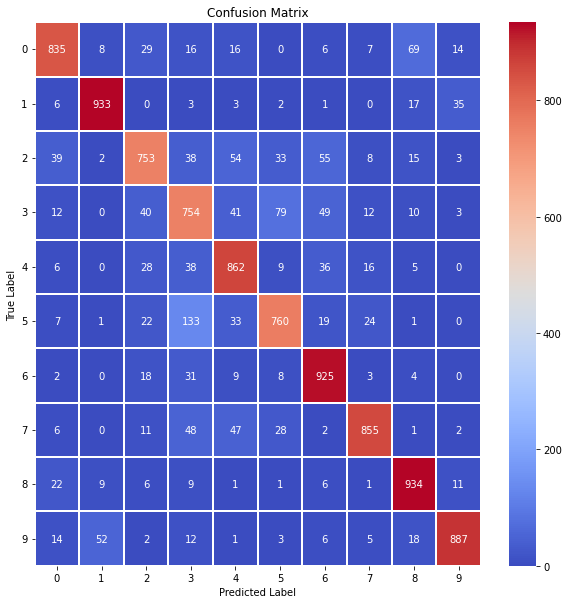

In [62]:
for i in range(2):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample_50, y_train_sample_50, batch_size=batch_size, epochs=epochs//2, verbose=1)
  path = f'models/CNN_CIFAR-10_sub_50_{i}.h5'
  model3.save(path)

preds_50 = model3.predict(X_test)
y_pred_50 = np.argmax(preds_50, axis=1)

# print scores
print(f'Accuracy: {accuracy_score(y_test, y_pred_50)}')
print(f'Precision: {precision_score(y_test, y_pred_50, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred_50, average="micro")}')
print(f'F1: {f1_score(y_test, y_pred_50, average="micro")}')

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred_50)

--- Increment 1 on a subsampled dataset ---
Epoch 1/50
74/74 [==============================] - 8s 112ms/step - loss: 0.5684 - accuracy: 0.8853
Epoch 2/50
74/74 [==============================] - 8s 108ms/step - loss: 0.5472 - accuracy: 0.8901
Epoch 3/50
74/74 [==============================] - 8s 108ms/step - loss: 0.5412 - accuracy: 0.8948
Epoch 4/50
74/74 [==============================] - 8s 108ms/step - loss: 0.5247 - accuracy: 0.8976
Epoch 5/50
74/74 [==============================] - 8s 107ms/step - loss: 0.5155 - accuracy: 0.9025
Epoch 6/50
74/74 [==============================] - 8s 107ms/step - loss: 0.5195 - accuracy: 0.9003
Epoch 7/50
74/74 [==============================] - 8s 107ms/step - loss: 0.5071 - accuracy: 0.9024
Epoch 8/50
74/74 [==============================] - 8s 107ms/step - loss: 0.5109 - accuracy: 0.9014
Epoch 9/50
74/74 [==============================] - 8s 107ms/step - loss: 0.5025 - accuracy: 0.9025
Epoch 10/50
74/74 [==============================] - 8s 

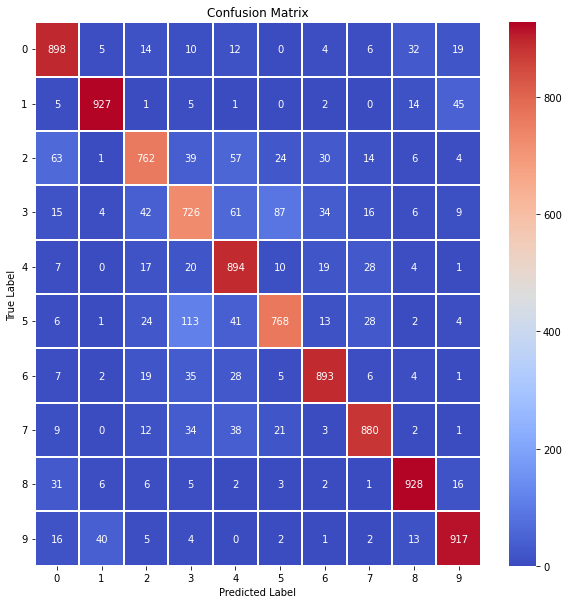

In [63]:
print(f'--- Increment {i} on a subsampled dataset ---')
model3.fit(X_train_sample_75, y_train_sample_75, batch_size=batch_size, epochs=epochs, verbose=1)
path = f'models/CNN_CIFAR-10_sub_75_{i}.h5'
model3.save(path)

preds_75 = model3.predict(X_test)
y_pred_75 = np.argmax(preds_75, axis=1)

# print scores
print(f'Accuracy: {accuracy_score(y_test, y_pred_75)}')
print(f'Precision: {precision_score(y_test, y_pred_75, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred_75, average="micro")}')
print(f'F1: {f1_score(y_test, y_pred_75, average="micro")}')

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred_75)

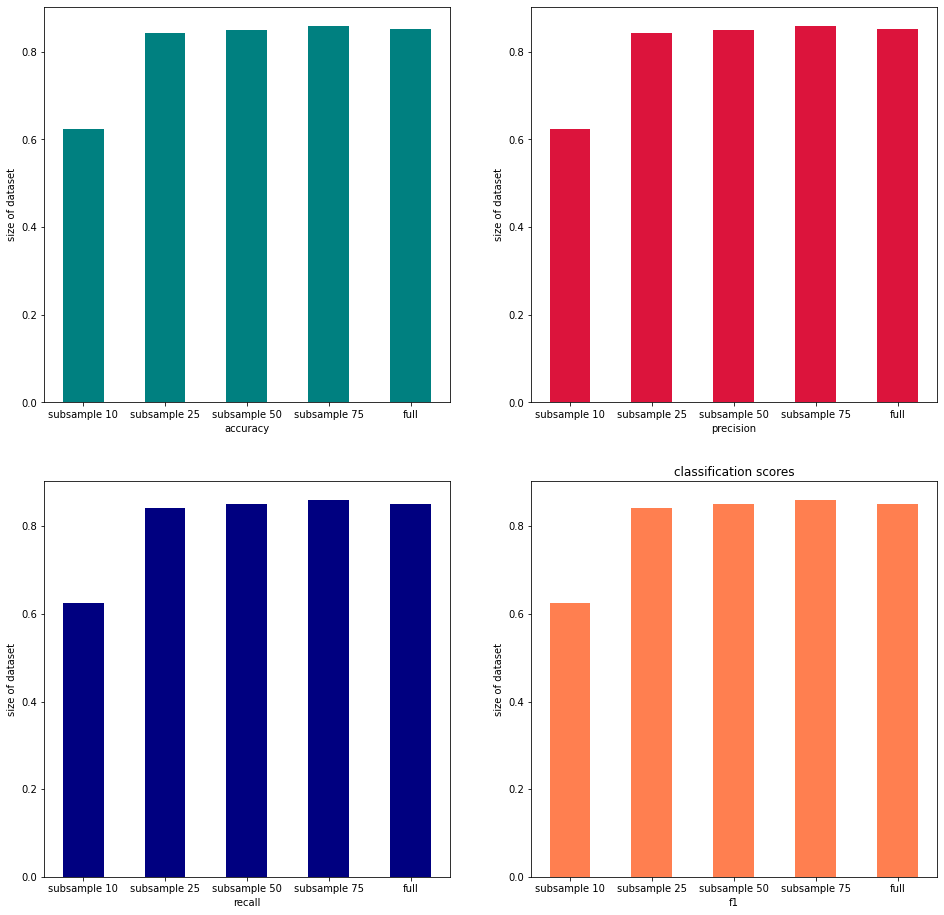

In [66]:
from matplotlib import pyplot as plt


accuracy = [accuracy_score(y_test, y_pred_10), accuracy_score(y_test, y_pred_25), accuracy_score(y_test, y_pred_50), accuracy_score(y_test, y_pred_75), accuracy_score(y_test, y_pred)]
precision = [precision_score(y_test, y_pred_10, average="micro"), precision_score(y_test, y_pred_25, average="micro"), 
             precision_score(y_test, y_pred_50, average="micro"), precision_score(y_test, y_pred_75, average="micro"), precision_score(y_test, y_pred, average="micro")]
recall = [recall_score(y_test, y_pred_10, average="micro"), recall_score(y_test, y_pred_25, average="micro"), 
          recall_score(y_test, y_pred_50, average="micro"), recall_score(y_test, y_pred_75, average="micro"), recall_score(y_test, y_pred, average="micro")]
f1 = [f1_score(y_test, y_pred_10, average="micro"), f1_score(y_test, y_pred_25, average="micro"), 
      f1_score(y_test, y_pred_50, average="micro"), f1_score(y_test, y_pred_75, average="micro"), f1_score(y_test, y_pred, average="micro")]
labels = ['subsample 10', 'subsample 25', 'subsample 50', 'subsample 75', 'full']

plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.bar(labels, accuracy, width=0.5, color = 'teal', label='accuracy')
plt.ylabel('size of dataset')
plt.xlabel('accuracy')

plt.subplot(2, 2, 2)
plt.bar(labels, precision, width=0.5, color = 'crimson', label='accuracy')
plt.ylabel('size of dataset')
plt.xlabel('precision')

plt.subplot(2, 2, 3)
plt.bar(labels, recall, width=0.5, color = 'navy', label='accuracy')
plt.ylabel('size of dataset')
plt.xlabel('recall')

plt.subplot(2, 2, 4)
plt.bar(labels, f1, width=0.5, color = 'coral', label='accuracy')
plt.ylabel('size of dataset')
plt.xlabel('f1')

# Defines plot title
plt.title("classification scores")
plt.show()